# The Curse of Dimensionality



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import pi
from scipy.spatial import distance_matrix
from scipy.special import factorial, gamma

pd.options.display.float_format = '{:,.6f}'.format

In [2]:
unit_length = 1.0
y = []
nnd = [] # nearest neighbor distances
fnd = [] # furthest neighbor distances
#x = 2 ** np.arange(1, 14) # powers of 2
x = [2, 4, 8, 15, 30, 60, 125, 250, 500, 1000, 2000]
for N in x:
    # Generate a dataset containing 1,000 random points in N-dimensional space
    data = np.random.uniform(0.0, unit_length, (1000,N))
    
    # Choose a random point
    k = data[np.random.choice(len(data))].reshape(-1,N)

    # Calculate the distance matrix
    d = distance_matrix(k, data)
    
    # Find minimum and maximum distances
    nnd = nnd + [ np.min(d[d>0.0]) ] # nearest neighbor distance
    fnd = fnd + [ np.max(d) ]        # furthest neighbor distance

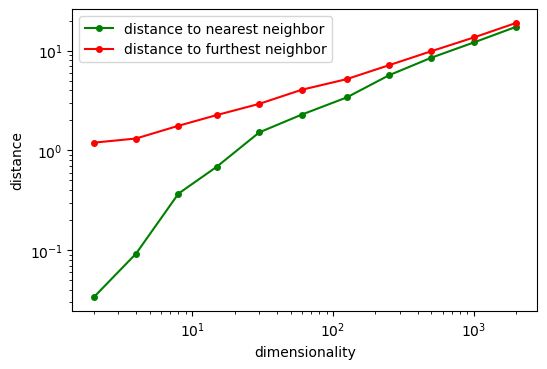

In [3]:
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot(x, nnd, marker='o', ms=4, linestyle='-', color='green', label='distance to nearest neighbor')
ax.plot(x, fnd, marker='o', ms=4, linestyle='-', color='red', label='distance to furthest neighbor')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('dimensionality')
ax.set_ylabel('distance')
ax.legend()
plt.show()

We can see that in lower dimensional spaces, the differences between points that are
"close" and those that are "far away" differ significantly. In other words, distance
is a meaningful way to distinguish points.

In [4]:
df = pd.DataFrame({
    'dim': x,
    'nnd': nnd,
    'fnd': fnd
})

df['ld'] = np.power(df.dim, 0.5) # longest diagonal
df['diff'] = df.fnd - df.nnd
df['reldiff'] = (df.fnd - df.nnd) / df.ld # difference relative to longest diagonal
df['relnnd'] = df.nnd / df.ld
df

,dim,nnd,fnd,ld,diff,reldiff,relnnd
0,2,0.033538,1.194949,1.414214,1.161411,0.821241,0.023715
1,4,0.092112,1.315729,2.000000,1.223617,0.611809,0.046056
2,8,0.368257,1.765646,2.828427,1.397389,0.494052,0.130199
3,15,0.687213,2.263849,3.872983,1.576636,0.407086,0.177438
4,30,1.517040,2.931440,5.477226,1.414400,0.258233,0.276972
5,60,2.285127,4.056604,7.745967,1.771477,0.228697,0.295009
6,125,3.395100,5.183082,11.180340,1.787982,0.159922,0.303667
7,250,5.673601,7.156079,15.811388,1.482478,0.093760,0.358830
8,500,8.517327,9.897708,22.360680,1.380382,0.061733,0.380906
9,1000,12.107413,13.582931,31.622777,1.475518,0.046660,0.382870


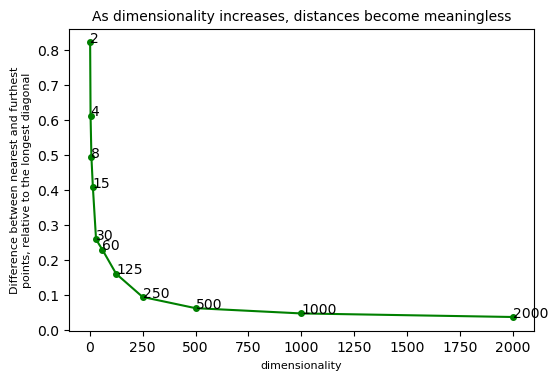

In [5]:
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot(df.dim, df.reldiff, marker='o', ms=4, linestyle='-', color='green')
for xy in zip(df.dim, df.reldiff):
    ax.annotate(xy[0], xy=xy, textcoords='data')
ax.set_title('As dimensionality increases, distances become meaningless',
            fontsize=10)
ax.set_xlabel('dimensionality', fontsize=8)
ax.set_ylabel('Difference between nearest and furthest\npoints, relative to the longest diagonal', fontsize=8)
plt.show()

### Volume of an N-ball

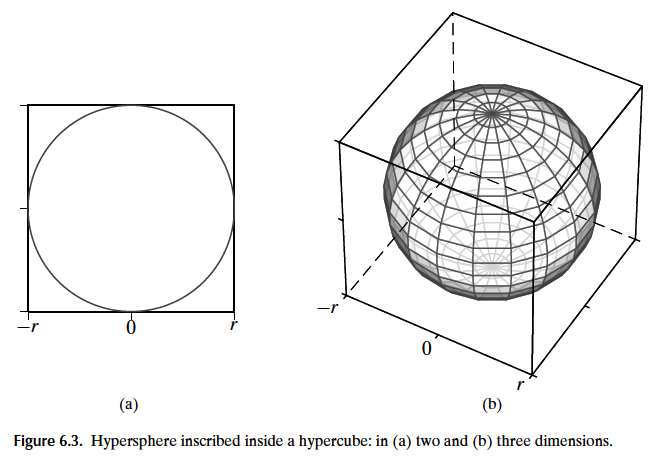

Source: Zaki, *Data Mining and Analysis*

$$ V_n(R) = \frac{\pi^\frac{n}{2}}{\Gamma(\frac{n}{2}+1)} R^n $$

In [6]:
# Calculate volume of N-ball inscribed inside an n-dimensional hypercube,
# with radius R
def nball_volume(n, unit_length=1.0):
    R = unit_length / 2.0
    return pi**(n/2) * (R**n) / gamma(n/2 + 1)

In [7]:
dims = list(range(2,11))
R = []
for n in dims:
    V = nball_volume(n)
    # ratio of volume outside the n-ball to volume inside
    R.append((1.-V) / V)

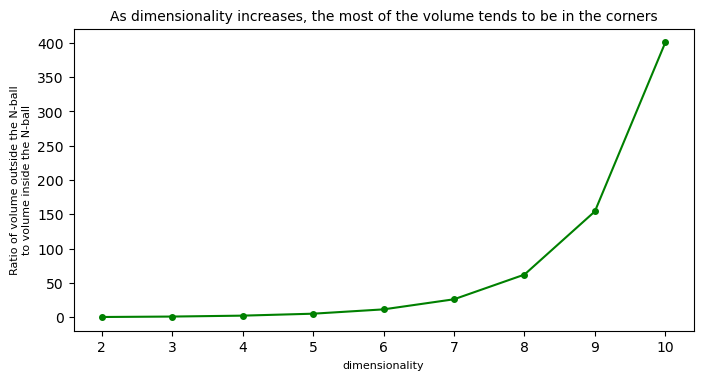

In [8]:
fig = plt.figure(figsize=(8,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot(dims, R, marker='o', ms=4, linestyle='-', color='green')
#for xy in zip(df.dim, df.reldiff):
#    ax.annotate(xy[0], xy=xy, textcoords='data')
ax.set_title('As dimensionality increases, the most of the volume tends to be in the corners',
            fontsize=10)
ax.set_xlabel('dimensionality', fontsize=8)
ax.set_ylabel('Ratio of volume outside the N-ball\nto volume inside the N-ball', fontsize=8)
plt.show()

As dimensionality increases, the volume outside the N-ball increases
very fast, such that if points are uniformly distributed in N-dimensional space,
the probability of any given point existing inside the N-ball approaches zero.

In other words, the vast majority of points in a given dataset will tend to be
in the corners—the spikes in the conceptual view below.

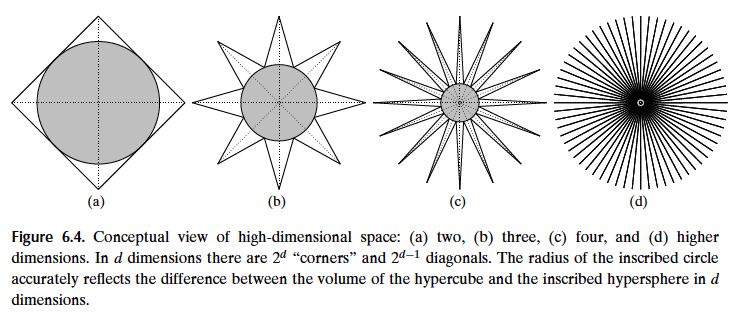

Source: Zaki, *Data Mining and Analysis*

And because our ability to get enough data points to fill the space cannot
keep pace with the increase in dimensionality, our data points all will 
tend to be very far from one another. Distances among points, thus, are
rendered meaningless.